## Import necessary modules

In [1]:
import os

# to explore the audio file and extract features
import librosa
import librosa.display

# to visualize the audio features(mfcc)
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display

# to store the features of the audio file
import numpy as np

# to split the data to train and test
from sklearn.model_selection import train_test_split

# tensorflow
import tensorflow as tf

# for tracking the tensorboard
import time

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Exploring an audio file which pronounce "BED". 

In [19]:
file = r"F:\Tensorflow\Speech Recognition\Sample\data\bed\0b77ee66_nohash_0.wav"
IPython.display.Audio(file)

### Let, "wave" is the audio time series and "sr" is the sampling rate. Taking mono = "True" for converting signal to mono

In [20]:
wave, sr = librosa.load(file, mono = True)

In [21]:
print(wave)

[-0.00371473  0.00174845  0.00537217 ... -0.00161011 -0.00593938
 -0.00477685]


In [22]:
print(sr)

22050


#### From the results, we see that the sampling rate of this audio file is 22050. 

## Plot the file

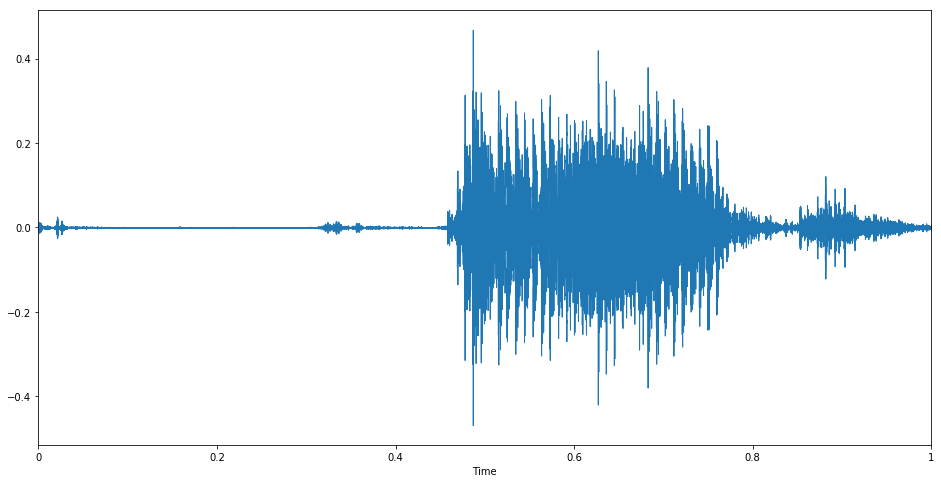

In [23]:
plt.figure(figsize = (16, 8))
librosa.display.waveplot(wave, sr = sr)

## Extract the feature(MFCC) of the audio file.

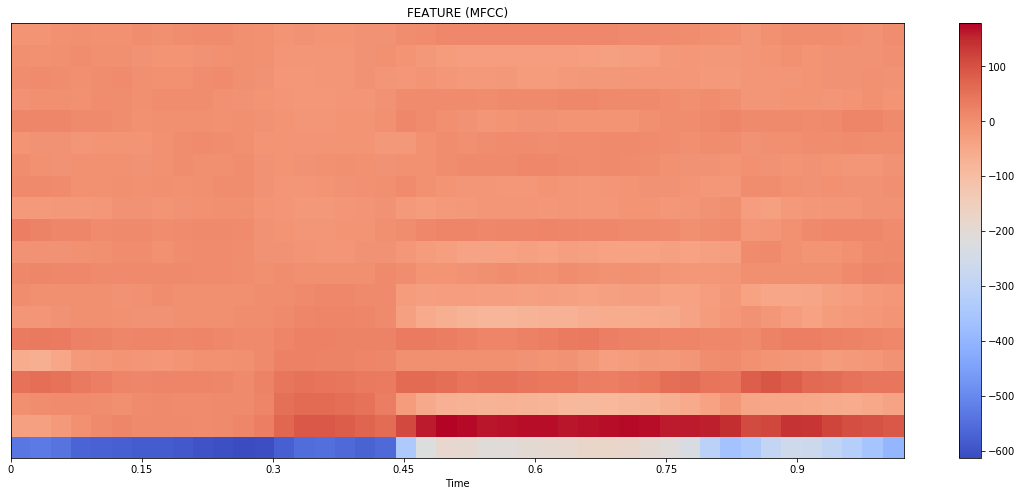

In [24]:
feature_mfcc = librosa.feature.mfcc(y = wave, sr = sr, n_mfcc = 20)
plt.figure(figsize=(20,8))
plt.title('FEATURE (MFCC)')
librosa.display.specshow(feature_mfcc, x_axis = 'time')
plt.colorbar()

# Execute the ASR in Tensorflow

### To reduce the time just consider four words "BED", "BIRD", "CAT", "DOG", "FIVE", "Follow", "FORWARD"

### Extract the features(MFCC) of the audio files.

#### First, Map the labels

In [25]:
os.chdir(r"F:\Tensorflow\Speech Recognition\Sample\short")

# Mapping the Label
Label =  os.listdir()

Label = np.unique(Label)
Label_Map = {}
for i in range(len(Label)):
        Label_Map[Label[i]] = i
        
        
print("Label Map: ", Label_Map)


# Mapping the complete audio file.
label_str =  os.listdir()
cwd = os.getcwd()

y = []

for label in label_str:
    data_path =  os.path.join(cwd, label)
    files = os.listdir(data_path)
    for file in files:
        y.append(Label_Map[label])
        
y = np.array(y)


Label Map:  {'backward': 0, 'bed': 1, 'bird': 2, 'cat': 3, 'dog': 4, 'five': 5, 'follow': 6, 'forward': 7}


#### Extract the features of each audio files and store it in the numpy 3-D array MFCC_Feature

In [26]:
width = 44
MFCC_Feature = np.zeros((len(y), 20, 44))
i = 0
for label in label_str:
    data_path =  os.path.join(cwd, label)
    files = os.listdir(data_path)
    for file in files:
        file_path = os.path.join(cwd, label, file)
        wave, sr = librosa.load(file_path, mono = True)        
        feature_mfcc = librosa.feature.mfcc(y = wave, sr = sr, n_mfcc = 20)
        feature_mfcc_pad = np.pad(feature_mfcc, ((0, 0), (0, width - len(feature_mfcc[0]))), mode = 'constant')
        MFCC_Feature[i] = feature_mfcc_pad
        i = i+1

In [27]:
print(MFCC_Feature.shape)

(17089, 20, 44)


### Split the data to train and test with the help of sklearn

In [28]:
X_train, X_test, y_train, y_test = train_test_split( MFCC_Feature, y, test_size=0.20)

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

### Train the model with tensorflow

In [29]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs= 3)

Epoch 1/3
13671/13671 [==============================] - 2s 129us/step - loss: 1.3029 - acc: 0.5264
Epoch 2/3
13671/13671 [==============================] - 1s 102us/step - loss: 0.9046 - acc: 0.6855
Epoch 3/3
13671/13671 [==============================] - 1s 102us/step - loss: 0.7295 - acc: 0.7503


In [30]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

3418/3418 [==============================] - 0s 74us/step
0.7136099588947732
0.7513165592519493
